In [3]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

In [63]:
def input_file(filename):
    f = open(filename, 'r')
    i = next(f)
    x, y = [], []
    for i in f:
        i = i.split()
        pos = (int(i[1]) + int(i[2])) / 2
        x.append(pos)
        y.append(float(i[4]))
    f.close()
    
    x_new = np.linspace(min(x), max(x), 200)
    f = interp1d(x, y, kind='quadratic')
    y_smooth=f(x_new)
    return x_new, y_smooth

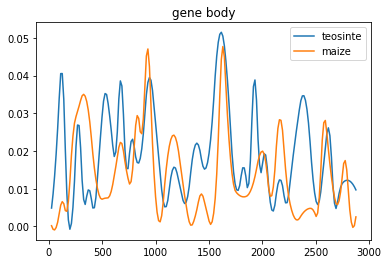

In [52]:
teosinte_b = input_file('sw4a-b.50bp.windowed.pi')
maize_b = input_file('G4a-B.50bp.windowed.pi')


plt.plot(teosinte_b[0], teosinte_b[1], label='teosinte')
plt.plot(maize_b[0], maize_b[1], label='maize')
plt.title('gene body')
plt.legend()

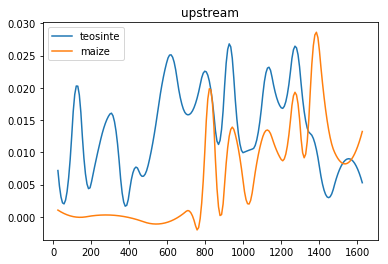

In [51]:
teosinte_u = input_file('sw4a-u.50bp.windowed.pi')
maize_u = input_file('G4a-U.50bp.windowed.pi')


plt.plot(teosinte_u[0], teosinte_u[1], label='teosinte')
plt.plot(maize_u[0], maize_u[1], label='maize')
plt.title('upstream')
plt.legend()

### plot Nucleotide diversity across *sweet4c*

In [15]:
def input_file2(filename, loc=0):
    f = open(filename, 'r')
    i = next(f)
    x, y = [], []        
    for i in f:
        i = i.split()
        pos = (int(i[1]) + int(i[2]) - 1) / 2
        x.append(pos-loc)
        y.append(float(i[4]))
    f.close()
    x_new = np.linspace(min(x), max(x), 50)
    f = interp1d(x, y, kind='quadratic')
    y_smooth=f(x_new)
    return x, y
    #return x_new, y_smooth

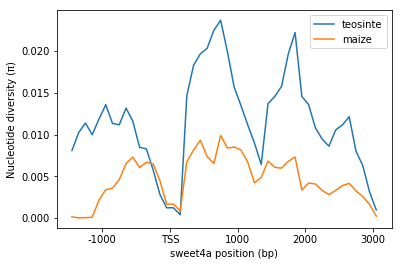

In [16]:
teosinte_b = input_file2('sw4a-b.100bp.windowed.pi')
maize_b = input_file2('G4a-B.100bp.windowed.pi')
teosinte_u = input_file2('sw4a-u.100bp.windowed.pi', 1698)
maize_u = input_file2('G4a-U.100bp.windowed.pi', 1698)

plt.plot(teosinte_u[0] + teosinte_b[0], teosinte_u[1] + teosinte_b[1], label='teosinte')
plt.plot(maize_u[0] + maize_b[0], maize_u[1] + maize_b[1], label='maize')
plt.xticks([-1000, 0, 1000, 2000, 3000], ['-1000', 'TSS', '1000', '2000', '3000'])
plt.xlabel('sweet4a position (bp)')
plt.ylabel('Nucleotide diversity (π)')
plt.legend()
plt.show()

### 计算差值和比值

In [17]:
union_u = set(teosinte_u[0]) & set(maize_u[0])
teosinte_pi_u = []
for n, i in enumerate(teosinte_u[0]):
    if i in union_u:
        teosinte_pi_u.append(teosinte_u[1][n])
teosinte_pi_u = np.array(teosinte_pi_u)

maize_pi_u = []
for n, i in enumerate(maize_u[0]):
    if i in union_u:
        maize_pi_u.append(maize_u[1][n])
maize_pi_u = np.array(maize_pi_u)

In [18]:
union_b = set(teosinte_b[0]) & set(maize_b[0])
teosinte_pi_b = []
for n, i in enumerate(teosinte_b[0]):
    if i in union_b:
        teosinte_pi_b.append(teosinte_b[1][n])
teosinte_pi_b = np.array(teosinte_pi_b)

maize_pi_b = []
for n, i in enumerate(maize_b[0]):
    if i in union_b:
        maize_pi_b.append(maize_b[1][n])
maize_pi_b = np.array(maize_pi_b)

In [19]:
union_u = list(union_u)
union_u.sort()
for i in union_u:
    print(i, end='\t')
print()
pi1 = []
for i in teosinte_pi_u - maize_pi_u:
    pi1.append(i)
    print(i, end='\t')
print()
pi2 = []
for i in maize_pi_u / teosinte_pi_u :
    pi2.append(i)
    print(i, end='\t')
print()

-1448.0	-1348.0	-1248.0	-1148.0	-1048.0	-948.0	-848.0	-748.0	-648.0	-548.0	-448.0	-348.0	-248.0	-148.0	-48.0	52.0	152.0	
0.007920943	0.0102109855	0.0113149666	0.009851588	0.00969987	0.0101689	0.00772984	0.006556050000000001	0.006638099999999999	0.00429812	0.0024180699999999996	0.0016013000000000008	-0.0007196299999999997	-0.0016553899999999996	-0.0004415300000000001	-0.0004415300000000001	-0.00045116099999999994	
0.01971681604304812	0.002755537541995468	0.004980249041471736	0.01140682731810309	0.1817631974086009	0.2503133247814099	0.3170976491063777	0.4131187897233909	0.4955889392937744	0.6292806624115922	0.7145668222456732	0.8067372227271136	1.1247417212114488	1.5825945569277224	1.3558171957224252	1.3558171957224252	2.10920136498633	


In [20]:
union_b = list(union_b)
union_b.sort()
for i in union_b:
    print(i, end='\t')
print()

for i in teosinte_pi_b - maize_pi_b:
    pi1.append(i)
    print(i, end='\t')
print()

for i in maize_pi_b / teosinte_pi_b:
    pi2.append(i)
    print(i, end='\t')
print()

250.0	350.0	450.0	550.0	650.0	750.0	850.0	950.0	1050.0	1150.0	1250.0	1350.0	1450.0	1550.0	1650.0	1750.0	1850.0	1950.0	2050.0	2150.0	2250.0	2350.0	2450.0	2550.0	2650.0	2750.0	2850.0	2950.0	3050.0	
0.00791236	0.010126559999999998	0.010344779999999998	0.012926169999999999	0.01593574	0.01378383	0.011513840000000001	0.007158920000000001	0.0053246000000000005	0.004451739999999999	0.00475197	0.00154113	0.006872660000000001	0.008463539999999999	0.009778789999999999	0.0128565	0.014884480000000002	0.011187780000000001	0.0093893	0.006707780000000001	0.006137160000000001	0.005799480000000001	0.007230599999999999	0.00725605	0.00796187	0.00474393	0.00371367	0.00149996	0.000729506	
0.4598334243582742	0.4460791178015054	0.47362041856844106	0.36346235288324225	0.2907077459930298	0.41758054634187564	0.4215342567611698	0.542745093029643	0.6047566379892664	0.6010485186313695	0.4702197397906284	0.7601070321158612	0.4982361100971015	0.4181334433329896	0.3794238970401584	0.34568856271852366	0.329404079131731

In [21]:
union = union_u + union_b

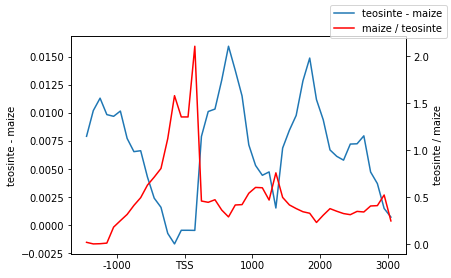

In [22]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(union, pi1, label='teosinte - maize')
ax1.set_ylabel('teosinte - maize')

ax2 = ax1.twinx()  # this is the important function
ax2.plot(union, pi2, 'r', label='maize / teosinte')
ax2.set_ylabel('teosinte / maize')
ax2.set_xlabel('sweet4a position (bp)')

plt.xticks([-1000, 0, 1000, 2000, 3000], ['-1000', 'TSS', '1000', '2000', '3000'])
fig.legend()
plt.show()


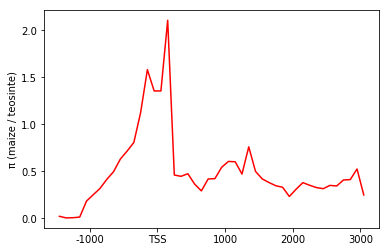

In [23]:
plt.plot(union, pi2, 'r', label='maize / teosinte')
plt.ylabel('π (maize / teosinte)')
plt.xticks([-1000, 0, 1000, 2000, 3000], ['-1000', 'TSS', '1000', '2000', '3000'])
plt.show()